# Part 2

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

1.Generate 50 2D-data points using the following function:  

In [2]:
def f(x):
    return np.sin(x**2+1)
    
def data_generater(f,x_start,x_stop,num):
    g_m=0
    g_v=0.4
    x = np.linspace(x_start,x_stop,num)
    y = f(x) + np.random.normal(g_m,g_v,size=num)

    x_tr = np.linspace(x_start,x_stop,num*100)
    y_tr = f(x_tr)
    return x,y,x_tr,y_tr

2.add Gaussian random noise to the data

In [3]:
[x,y,x_tr,y_tr]=data_generater(f,0,2,50)

3.Fit the generated noisy data using the MLE that employs the Gaussian basis functions as discussed in class.

In [4]:
def gaussian(x,xm,s):
    return np.exp((-1*(x-xm)**2)/(2*s*s))

def MLE_fit(x,y,M,S):
    N=len(x)
    X=np.zeros([N,M])
    vy=np.zeros([N,1])
    
    for n in range(0,N):
        mu=0
        for m in range(0,M):
            mu+=S
            X[n,m]=gaussian(x[n],mu,S)
        vy[n,0]=y[n]
        
    tmp=linalg.pinv(X)
    w=np.dot(tmp,vy)
    return w

def MLE_plot(x,w):
    M=len(w)
    N=len(x)
    X=np.zeros([N,M])
    
    for n in range(0,N):
        mu=0
        for m in range(0,M):
            mu+=S
            X[n,m]=gaussian(x[n],mu,S)
    
    y=np.dot(X,w)
    return x,y
    

In [5]:
M=4
S=0.67
w = MLE_fit(x,y,M,S)
print("W：\n",w)

W：
 [[ 1.62443882]
 [-1.68256847]
 [ 2.93328647]
 [-6.09125941]]


4.Show your results for different values of M that generate overfitting and underfitting curves.

M=4 S=0.670000


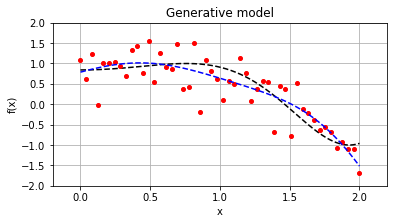

In [6]:
def figure_plot(x,y,x_tr,y_tr,x_ts,y_ts):
    fig, ax = plt.subplots(1, 1, figsize=(6, 3))
    ax.plot(x_tr, y_tr, '--k')
    ax.plot(x, y, 'or', ms=4)
    ax.plot(x_ts, y_ts,'--b')
    ax.set_xlim(-0.2, 2.2)
    ax.set_ylim(-2, 2)
    ax.set_title('Generative model')
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid()

[x_ts,y_ts]=MLE_plot(x,w)
print("M=%d"%M+" S=%f"%S)
figure_plot(x,y,x_tr,y_tr,x_ts,y_ts)

M=100 S=0.020000


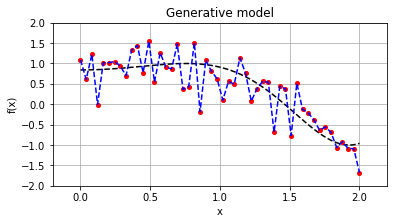

In [7]:
M=100
S=0.02
w = MLE_fit(x,y,M,S)
[x_ts,y_ts]=MLE_plot(x,w)
print("M=%d"%M+" S=%f"%S)
figure_plot(x,y,x_tr,y_tr,x_ts,y_ts)

M=2 S=3.000000


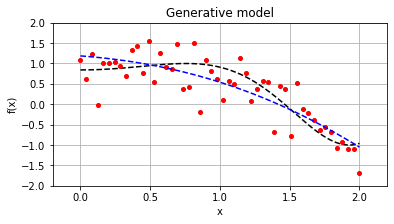

In [8]:
M=2
S=3
w = MLE_fit(x,y,M,S)
[x_ts,y_ts]=MLE_plot(x,w)
print("M=%d"%M+" S=%f"%S)
figure_plot(x,y,x_tr,y_tr,x_ts,y_ts)

5.Change the basis functions to the sigmoid basis functions, and show the results for different values of M that generate overfitting and underfitting curves.

In [9]:
def sigmoid(x,xm,s):
    return 1/(1+np.exp((xm-x)/s))

def MLE_sig_fit(x,y,M,S):
    N=len(x)
    X=np.zeros([N,M])
    vy=np.zeros([N,1])
    
    for n in range(0,N):
        mu=0
        for m in range(0,M):
            mu+=S
            X[n,m]=sigmoid(x[n],mu,S)
        vy[n,0]=y[n]
        
    tmp=linalg.pinv(X)
    w=np.dot(tmp,vy)
    return w

def MLE_sig_plot(x,w):
    M=len(w)
    N=len(x)
    X=np.zeros([N,M])
    
    for n in range(0,N):
        mu=0
        for m in range(0,M):
            mu+=S
            X[n,m]=sigmoid(x[n],mu,S)
    
    y=np.dot(X,w)
    return x,y

M=3 S=0.670000


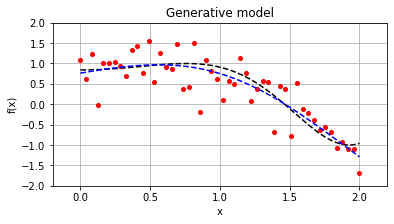

In [10]:
M=3
S=0.67
w = MLE_sig_fit(x,y,M,S)
[x_ts,y_ts]=MLE_sig_plot(x,w)
print("M=%d"%M+" S=%f"%S)
figure_plot(x,y,x_tr,y_tr,x_ts,y_ts)

M=100 S=0.100000


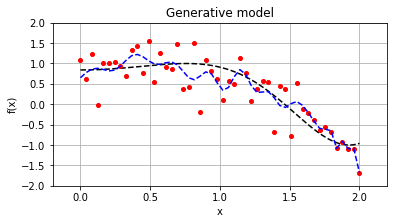

In [11]:
M=100
S=0.1
w = MLE_sig_fit(x,y,M,S)
[x_ts,y_ts]=MLE_sig_plot(x,w)
print("M=%d"%M+" S=%f"%S)
figure_plot(x,y,x_tr,y_tr,x_ts,y_ts)

M=2 S=2.000000


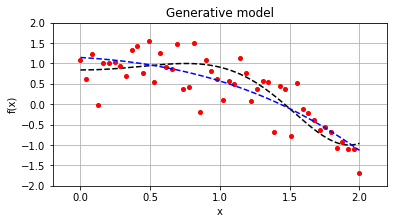

In [12]:
M=2
S=2
w = MLE_sig_fit(x,y,M,S)
[x_ts,y_ts]=MLE_sig_plot(x,w)
print("M=%d"%M+" S=%f"%S)
figure_plot(x,y,x_tr,y_tr,x_ts,y_ts)

6.Change the original curve function to  , and use the sigmoid basis function to estimate the best curve fitting from the noisy data. 

M=4 S=2.000000


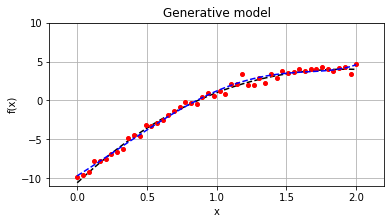

In [25]:
def g(x):
    return 0.4345*x**3-5.607*x**2+16.78*x-10.61
[x,y,x_tr,y_tr]=data_generater(g,0,2,50)

M=4
S=2
w = MLE_sig_fit(x,y,M,S)
[x_ts,y_ts]=MLE_sig_plot(x,w)
print("M=%d"%M+" S=%f"%S)
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')
ax.plot(x, y, 'or', ms=4)
ax.plot(x_ts, y_ts,'--b')
ax.set_xlim(-0.2, 2.2)
ax.set_ylim(-11, 10)
ax.set_title('Generative model')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()

M=4 S=0.020000


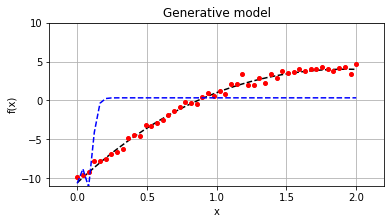

In [26]:
M=4
S=0.02
w = MLE_sig_fit(x,y,M,S)
[x_ts,y_ts]=MLE_sig_plot(x,w)
print("M=%d"%M+" S=%f"%S)
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')
ax.plot(x, y, 'or', ms=4)
ax.plot(x_ts, y_ts,'--b')
ax.set_xlim(-0.2, 2.2)
ax.set_ylim(-11, 10)
ax.set_title('Generative model')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()

M=100 S=3.000000


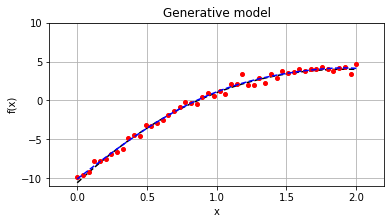

In [27]:
M=100
S=3
w = MLE_sig_fit(x,y,M,S)
[x_ts,y_ts]=MLE_sig_plot(x,w)
print("M=%d"%M+" S=%f"%S)
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')
ax.plot(x, y, 'or', ms=4)
ax.plot(x_ts, y_ts,'--b')
ax.set_xlim(-0.2, 2.2)
ax.set_ylim(-11, 10)
ax.set_title('Generative model')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()

7. basis function is very useful in engineering. For instance, the Fourier Transform bases on the sine and cosine function. Meanwhile, the Basis Function is more flexible and less-likely overfitting. In the last figure, when M=100 and S=3, the model fits well while it will overfit if it is based on polynomial funcion.